<a href="https://www.kaggle.com/code/risakashiwabara/eda-moving-average?scriptVersionId=161764626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p><center style="color:Black; font-family:Cormorant Garamond; font-size:30px;">Thanks for visiting my notebook📖👀 </center></p>

![](https://i.postimg.cc/yYhCBcgd/Firefly-33719.jpg)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Sample data acquisition</p>

In [2]:
data_death = pd.read_csv('/kaggle/input/pcr-japandata/death_total.csv')
data_death

,year,number of people
0,2020/2/14,1
1,2020/2/15,1
2,2020/2/16,1
3,2020/2/17,1
4,2020/2/18,1
...,...,...
1174,2023/5/3,74614
1175,2023/5/4,74633
1176,2023/5/5,74645
1177,2023/5/6,74654


In [3]:
data_pcr = pd.read_csv('/kaggle/input/pcr-japandata/pcr_positive_daily .csv')
data = data_pcr['number of people'].astype('int')
data_pcr

,year,number of people
0,2020/1/16,1
1,2020/1/17,0
2,2020/1/18,0
3,2020/1/19,0
4,2020/1/20,0
...,...,...
1204,2023/5/4,7343
1205,2023/5/5,5807
1206,2023/5/6,6229
1207,2023/5/7,14436


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> bar graph-deathdata-</p>

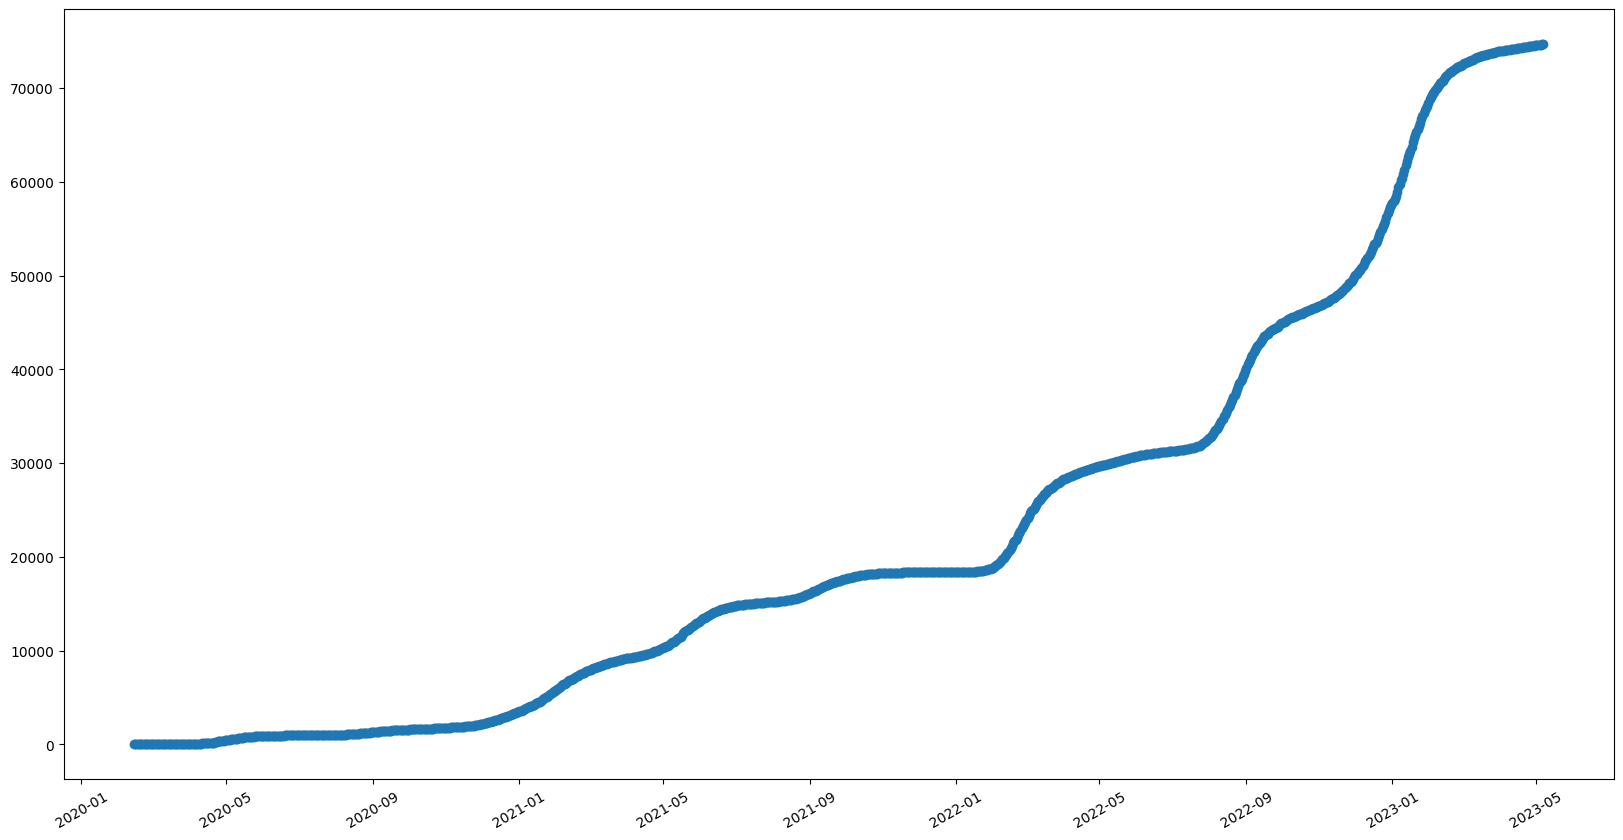

In [4]:
X_dt = pd.to_datetime(data_death['year'])
Y = data_death.iloc[:, 1] 
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=30) 
plt.plot(X_dt, Y,marker='o')

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> bar graph-pcrdata-</p>

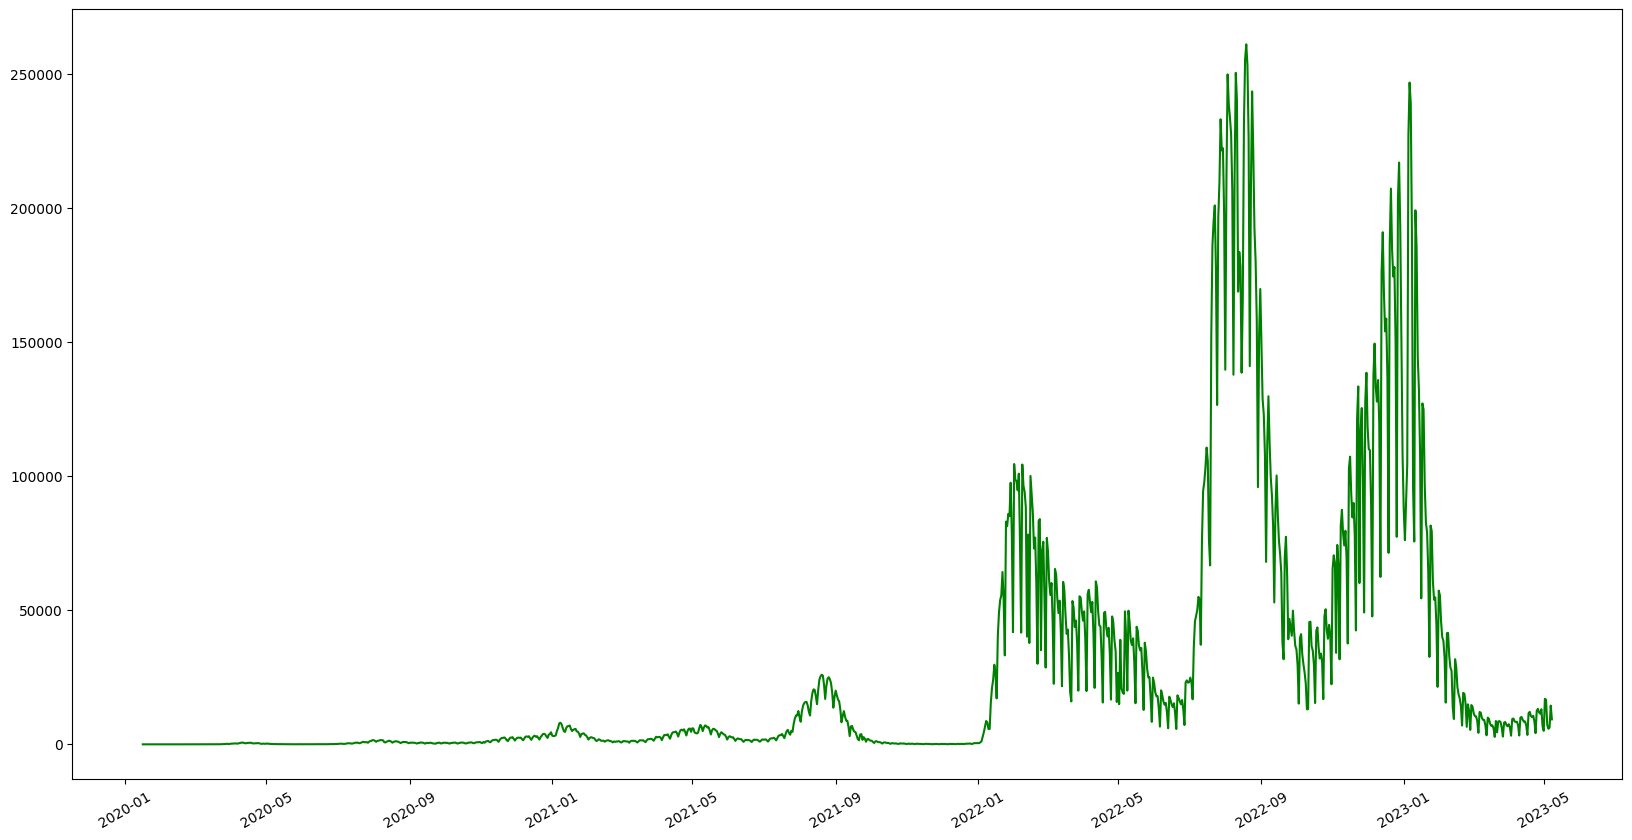

In [5]:
X_dt = pd.to_datetime(data_pcr['year'])
Y = data_pcr.iloc[:, 1] 
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=30) 
plt.plot(X_dt, Y,'g')

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Moving Average</p>

In [6]:
#Moving Average
num_data = np.size(data)

moving_average = np.zeros(num_data)

k = 5

for n in range(num_data):
  if n - k < 0:
    moving_average[n] = np.mean(data[:n+k+1])
  elif n + k >= num_data:
    moving_average[n] = np.mean(data[n-k:])
  else:
    moving_average[n] = np.mean(data[n-k : n+k+1])

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> -mix-</p>

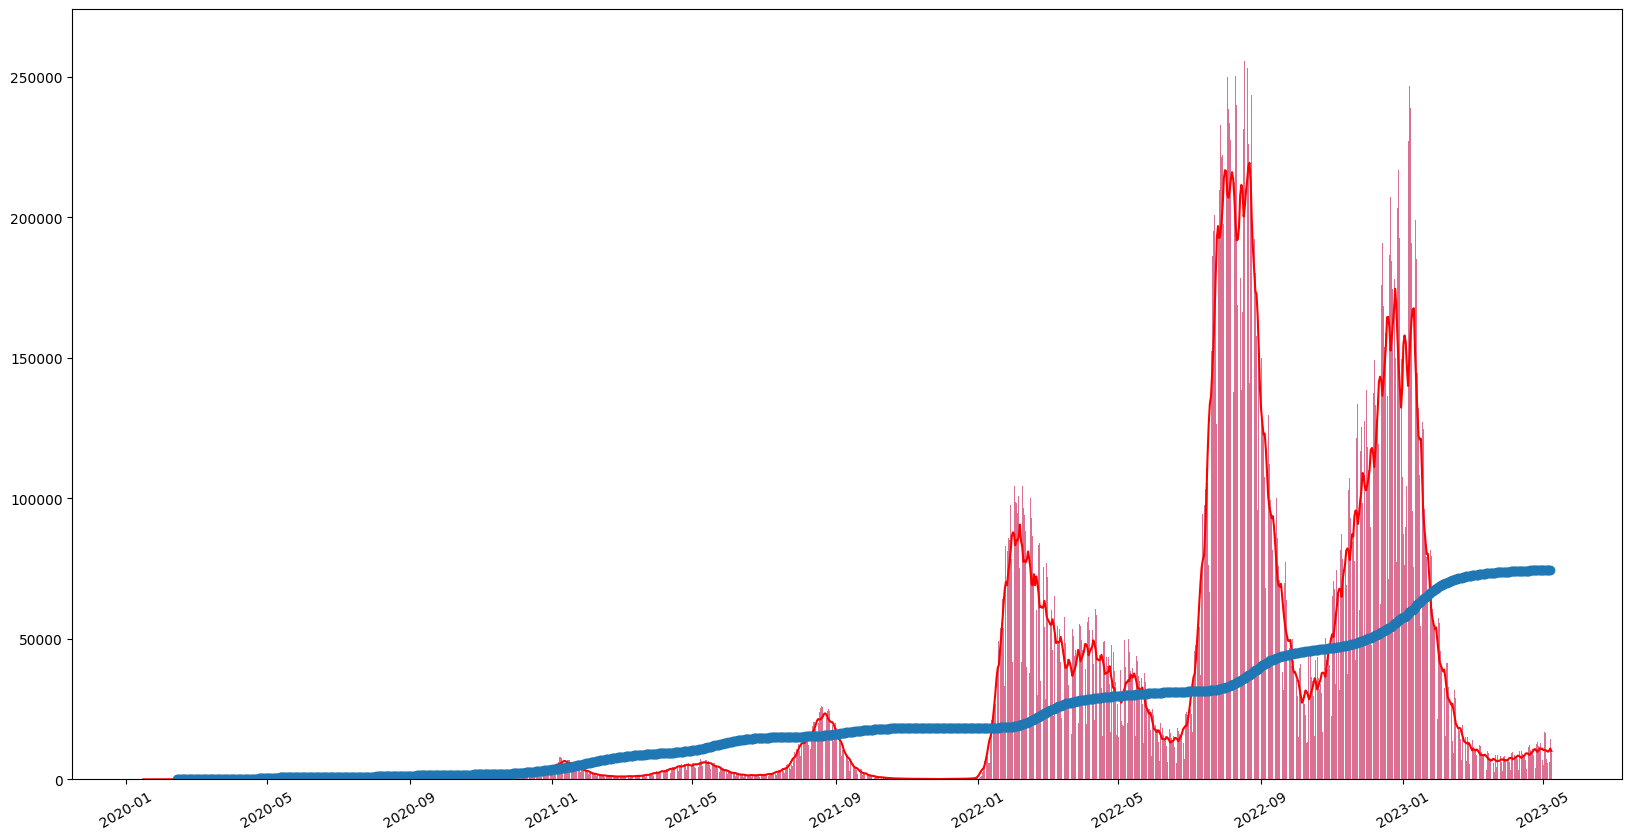

In [7]:
X_1 = pd.to_datetime(data_pcr['year'])
Y_2 = data_pcr.iloc[:, 1] 

X_3 = pd.to_datetime(data_death['year'])
Y_4 = data_death.iloc[:, 1] 
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=30) 
plt.plot(X_1, moving_average, label='Moving Average', color='r')
plt.bar(X_1, Y_2, color='#db7093')
plt.plot(X_3, Y_4, marker = 'o')

plt.show()